In [1]:
import numpy as np
import pandas as pd

<AxesSubplot:>

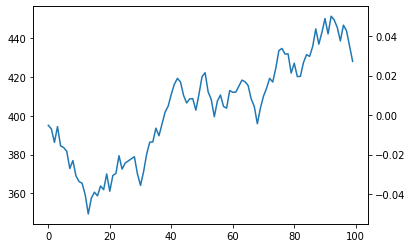

In [233]:
window = 300

df = pd.DataFrame(400 + np.cumsum(0.1 + np.random.randint(-10, 10, 100)), columns=['close'])

def tripple_barrier(df_col, upper_pct, lower_pct):
    """Return label associated with first time crossing of vertical, upper or lower barrier"""

    initial_value = df_col.iat[0]
    upper_threshold = initial_value * (1 + upper_pct)
    lower_threshold = initial_value * (1 - lower_pct)

    # Get index position of first time upper & lower are crossed
    upper_idx = (df_col > upper_threshold).argmax() if (df_col > upper_threshold).any() else 9999
    lower_idx = (df_col < lower_threshold).argmax() if (df_col < lower_threshold).any() else 9999

    # Based on first crossing, assign appropriate label
    if upper_idx < lower_idx:
        barrier = 1
    elif lower_idx < upper_idx:
        barrier = 2
    else:
        barrier = 3

    return barrier

params = {"upper_pct": 0.02, "lower_pct": 0.02}
df["&thrust"] = (df["close"]
    .shift(-window)
    .rolling(window + 1)
    .apply(tripple_barrier, raw=False, kwargs=params))

df["close"].plot()
df["&thrust"].plot(secondary_y=True)

In [231]:
lookup = {1: "upper", 2: "lower", 3: "vertical"}

df["&thrust"].map(lookup)
# [lookup[x] for x in df["label"].values if not np.isnan(x)]

0          NaN
1     vertical
2     vertical
3     vertical
4     vertical
        ...   
95    vertical
96    vertical
97       upper
98    vertical
99         NaN
Name: &thrust, Length: 100, dtype: object

In [228]:
np.isnan("tr")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''